# 5-9. IMDB 영화리뷰 감성분석 (2) 딥러닝 모델 설계와 훈련

In [42]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

In [43]:
# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,
                                   output_dim = word_vector_dim,
                                   input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
# model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
# model.add(tf.keras.layers.GlobalMaxPooling1D())
# model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))


model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
# model.add(tf.keras.layers.GlobalMaxPooling1D())
# model.add(tf.keras.layers.Conv1D(128, 3, activation='relu'))


# model.add(tf.keras.layers.Conv1D(256, 5, activation='relu'))
# model.add(tf.keras.layers.MaxPooling1D(5))
# model.add(tf.keras.layers.Conv1D(256, 5, activation='relu'))
# model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  

expected min_ndim=3, found ndim=2. Full shape received: (None, 64)

In [139]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
conv1d_47 (Conv1D)           (None, None, 64)          5184      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, None, 64)          20544     
_________________________________________________________________
conv1d_49 (Conv1D)           (None, None, 128)         41088     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, None, 128)       

In [131]:
pre_x_train.shape

(25000, 580)

In [44]:
# validation set 10000건 분리 
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

In [45]:
partial_x_train.shape, partial_y_train.shape, x_val.shape, y_val.shape

((15000, 580), (15000,), (10000, 580), (10000,))

In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 34s 93ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6934 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6757 - accuracy: 0.5594 - val_loss: 0.6149 - val_accuracy: 0.6184
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5605 - accuracy: 0.6557 - val_loss: 0.5632 - val_accuracy: 0.6598
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5000 - accuracy: 0.6912 - val_loss: 0.5418 - val_accuracy: 0.6670
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4692 - accuracy: 0.7039 - val_loss: 0.5477 - val_accuracy: 0.6670
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4508 - accuracy: 0.7148 - val_loss: 0.5612 - val_accuracy: 0.6651
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4445 - accuracy: 0.7128 - val_loss: 0.5825 - val_accuracy: 0.6596
Epoch 8/20
3

In [47]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 3s - loss: 1.1114 - accuracy: 0.6355
[1.1114479303359985, 0.6354963779449463]


In [48]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


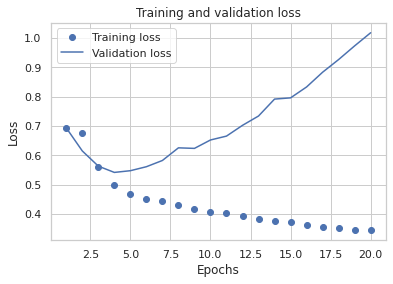

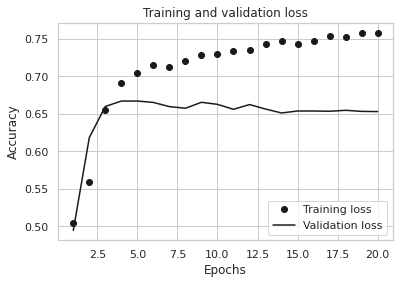

In [50]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'ko', label='Training loss')
plt.plot(epochs, val_acc, 'k', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [135]:
# validation set 10000건 분리 
x_val = pre_x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = pre_x_train[10000:]  
partial_y_train = y_train[10000:]

In [136]:
partial_x_train.shape, partial_y_train.shape, x_val.shape, y_val.shape

((15000, 580), (15000,), (10000, 580), (10000,))

In [140]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 34s 99ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6930 - accuracy: 0.5035 - val_loss: 0.6914 - val_accuracy: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.6442 - accuracy: 0.5876 - val_loss: 0.5901 - val_accuracy: 0.6270
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5478 - accuracy: 0.6618 - val_loss: 0.5640 - val_accuracy: 0.6516
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5049 - accuracy: 0.6831 - val_loss: 0.5703 - val_accuracy: 0.6475
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4761 - accuracy: 0.6936 - val_loss: 0.5868 - val_accuracy: 0.6495
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4574 - accuracy: 0.7062 - val_loss: 0.6037 - val_accuracy: 0.6494
Epoch 8/20
3

ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node sequential_14/conv1d_46/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_14/conv1d_46/conv1d/ExpandDims, sequential_14/conv1d_46/conv1d/ExpandDims_1)' with input shapes: [?,1,2,256], [1,5,256,256].

In [141]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 3s - loss: 1.1210 - accuracy: 0.6277
[1.1209816932678223, 0.6277253031730652]


In [142]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

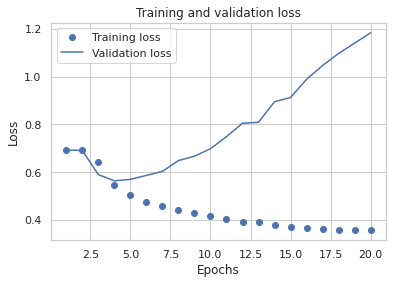

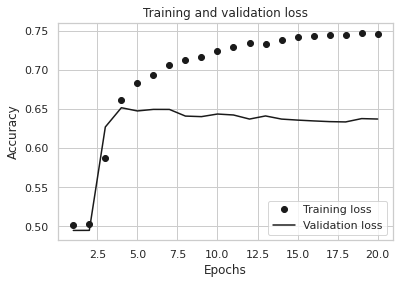

In [145]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'ko', label='Training loss')
plt.plot(epochs, val_acc, 'k', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

# 5-10. IMDB 영화리뷰 감성분석 (3) Word2Vec의 적용

pip list | grep gensim  
 Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

In [146]:
pip list

Package                       Version
----------------------------- ------------------
absl-py                       0.12.0
aiohttp                       3.8.1
aiosignal                     1.2.0
albumentations                1.1.0
antlr4-python3-runtime        4.8
anyio                         3.4.0
appdirs                       1.4.4
argon2-cffi                   21.1.0
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
attrs                         21.2.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.6.0
black                         21.12b0
bleach                        4.1.0
branca                        0.4.2
brotlipy                      0.7.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
chardet                       3.0.4
charset-normalizer            2.0.8
clang 

Note: you may need to restart the kernel to use updated packages.


In [148]:
pip list | grep

Usage: grep [OPTION]... PATTERNS [FILE]...
Try 'grep --help' for more information.
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe
Note: you may need to restart the kernel to use updated packages.


In [51]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

In [150]:
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [151]:
embedding_layer

In [152]:
weights

array([[-0.01558519,  0.02728641, -0.00322082, ..., -0.02080571,
         0.00459833, -0.00366097],
       [ 0.01042187, -0.03607398,  0.00197485, ...,  0.00310774,
         0.02502138, -0.01322552],
       [-0.01569632,  0.0061611 , -0.00060585, ..., -0.01738184,
        -0.0073849 ,  0.02866323],
       ...,
       [ 0.02530695,  0.01404232, -0.00234446, ..., -0.05122976,
        -0.04733543, -0.03112797],
       [-0.06122705, -0.12701838, -0.03817035, ...,  0.06791796,
        -0.02352854,  0.08983693],
       [-0.01807636,  0.05567204,  0.05302667, ..., -0.05653928,
         0.13901089, -0.02293701]], dtype=float32)

In [52]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size -4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

8

In [53]:
vocab_size

10000

In [54]:
word_vector_dim

16

In [55]:
# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [56]:
vectors

array([[ 0.04312138,  0.00104227,  0.00205824, ..., -0.0306549 ,
         0.00463929, -0.00848961],
       [-0.06327255,  0.02163192,  0.12213379, ..., -0.03013272,
        -0.03268394, -0.00462104],
       [ 0.03316801, -0.02939896,  0.03327263, ...,  0.03347839,
        -0.00047757, -0.05649702],
       ...,
       [ 0.0524331 , -0.04091349, -0.04587016, ...,  0.07847244,
        -0.03834896, -0.0452961 ],
       [-0.03504276,  0.10197242,  0.08281329, ..., -0.07209317,
         0.00089787, -0.00906769],
       [-0.02753892,  0.03782456,  0.06298878, ...,  0.00554873,
        -0.04175111, -0.03841277]], dtype=float32)

In [157]:
vectors.shape

(10000, 16)

In [158]:
vocab_size

10000

dir(Word2VecKeyedVectors)
 'load',
 'load_word2vec_format',
 'log_accuracy',
 'log_evaluate_word_pairs',
 'most_similar',
 'most_similar_cosmul',
 'most_similar_to_given',
 'n_similarity',
 'rank',
 'rank_by_centrality',
 'relative_cosine_similarity',
 'resize_vectors',
 'save',
 'save_word2vec_format',

`Word2VecKeyedVectors.load_word2vec_format`  
(
    fname,
    fvocab=None,
    binary=False,
    encoding='utf8',
    unicode_errors='strict',
    limit=None,
    datatype=<class 'numpy.float32'>,
    no_header=False,
)
Docstring:
Load KeyedVectors from a file produced by the original C word2vec-tool format.

In [57]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.03946383, -0.03228891, -0.0026424 ,  0.00866796,  0.02075857,
       -0.03027608, -0.02326338,  0.00719543,  0.04905571,  0.0501758 ,
        0.03962787,  0.03466666, -0.0015206 ,  0.07242784,  0.0071018 ,
       -0.00280075], dtype=float32)

위와 같이 얻은 워드 벡터를 가지고 재미있는 실험을 해볼 수 있습니다.  
워드 벡터가 의미 벡터 공간상에 유의미하게 학습되었는지 확인하는 방법 중에,  
단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인하는 방법이 있습니다.  
gensim을 사용하면 아래와 같이 해볼 수 있습니다.

word_vectors.`similar_by_word`(word, topn=10, restrict_vocab=None)  

Docstring: Compatibility alias for similar_by_key().

In [164]:
word_vectors.similar_by_word("love")

[('testament', 0.891566276550293),
 ('bursts', 0.8795433640480042),
 ('posh', 0.8724913001060486),
 ("person's", 0.8661274909973145),
 ('discussed', 0.8604552745819092),
 ('courage', 0.8581267595291138),
 ('photos', 0.8553259968757629),
 ('easy', 0.8540221452713013),
 ('revealing', 0.8514817953109741),
 ('wondered', 0.8490517139434814)]

In [167]:
word_vectors.similar_by_word("coffee")

[('corporate', 0.7556795477867126),
 ('supreme', 0.7392893433570862),
 ('noam', 0.7363121509552002),
 ('project', 0.7090692520141602),
 ('fired', 0.6882835626602173),
 ('rocker', 0.6858129501342773),
 ('created', 0.6826217770576477),
 ('chuckle', 0.6824902296066284),
 ('morgan', 0.6761656999588013),
 ('hart', 0.6720351576805115)]

In [174]:
word_vectors.similar_by_word("cream")

[("they'd", 0.765717089176178),
 ('artwork', 0.7414347529411316),
 ('peck', 0.7158447504043579),
 ("movie's", 0.713764488697052),
 ('other', 0.706948459148407),
 ('him', 0.7061700224876404),
 ('hamilton', 0.7039506435394287),
 ('tendency', 0.6904435157775879),
 ('laced', 0.688815712928772),
 ('ultimate', 0.6825063228607178)]

그래서 이번에는 구글에서 제공하는 Word2Vec이라는 사전학습된(Pretrained) 워드 임베딩 모델을 가져다 활용해 보겠습니다.  
Word2Vec은 무려 1억 개의 단어로 구성된 Google News dataset을 바탕으로 학습되었습니다.  
총 300만 개의 단어를 각각 300차원의 벡터로 표현한 것입니다.  
Word2Vec이 학습되는 원리에 대해서는 차후 깊이 있게 다루게 될 것입니다.  
하지만 그렇게 해서 학습된 Word2Vec이라는 것도 실은 방금 우리가 파일에 써본 Embedding Layer와 원리는 동일합니다.

임베딩의 개념에 대해 아주 잘 정리된 책 한국어 임베딩의 서론에서 왜 사전학습된 임베딩을 활용하는 것이 유리한지 설명해 주고 있습니다.  
바로 전이학습 때문입니다.  

`KeyedVectors.load_word2vec_format`  
(
    fname,
    fvocab=None,
    __binary=False__,
    encoding='utf8',
    unicode_errors='strict',
    __limit=None__,
    datatype=<class 'numpy.float32'>,
    no_header=False,
)
Docstring:
Load KeyedVectors from a file produced by the original C word2vec-tool format.

In [58]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, 
                                             binary=True, 
                                             limit=1000000)
# 메모리가 충분하다면 limt=None으로 하시면 300만 개를 모두 로딩합니다.

vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

300dim의 벡터로 이루어진 300만 개의 단어입니다. 이 단어 사전을 메모리에 모두 로딩하면 아주 높은 확률로 여러분의 실습환경에 메모리 에러가 날 것입니다. 그래서 KeyedVectors.load_word2vec_format 메서드로 워드 벡터를 로딩할 때 가장 많이 사용되는 상위 100만 개만 limt으로 조건을 주어 로딩했습니다.

메모리가 충분하다면 limt=None으로 하시면 300만 개를 모두 로딩합니다.

In [59]:
vector.shape

(300,)

In [176]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [178]:
word2vec.similar_by_word("icecream")

[('ice_cream', 0.6833236813545227),
 ('icecreams', 0.6506314277648926),
 ('ice_creams', 0.6471222639083862),
 ('lollies', 0.6184884905815125),
 ('Ice_cream', 0.569530189037323),
 ('biscuit', 0.5643337965011597),
 ('Mr_Whippy', 0.5594308376312256),
 ('lolly', 0.5510672330856323),
 ('crisps', 0.5448859333992004),
 ('Ice_Cream', 0.5431604385375977)]

In [69]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [179]:
print(embedding_matrix)

[[ 0.61233047  0.40604822  0.03935857 ...  0.2191575   0.14118157
   0.14095034]
 [ 0.41727279  0.63861532  0.4596283  ...  0.90781632  0.81209348
   0.04731334]
 [ 0.08487455  0.12212133  0.52826286 ...  0.3947899   0.3324172
   0.12744241]
 ...
 [ 0.14160156 -0.0043335  -0.17285156 ...  0.07861328 -0.15136719
   0.05004883]
 [ 0.04785156  0.12792969 -0.07763672 ...  0.13867188  0.31640625
   0.02001953]
 [-0.02526855  0.36328125  0.09033203 ... -0.20019531  0.40625
   0.13574219]]


In [183]:
300 * 7 * 16 + 16

33616

`Constant(value=0)`  
     
Initializer that generates tensors with constant values.

In [70]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))

model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [73]:
# 학습의 진행
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
15/15 [==============================] - 3s 140ms/step - loss: 0.6865 - accuracy: 0.5397 - val_loss: 0.6789 - val_accuracy: 0.5688
Epoch 2/20
15/15 [==============================] - 2s 127ms/step - loss: 0.6617 - accuracy: 0.6070 - val_loss: 0.6563 - val_accuracy: 0.6064
Epoch 3/20
15/15 [==============================] - 2s 127ms/step - loss: 0.6180 - accuracy: 0.6773 - val_loss: 0.6088 - val_accuracy: 0.6621
Epoch 4/20
15/15 [==============================] - 2s 128ms/step - loss: 0.5389 - accuracy: 0.7521 - val_loss: 0.5068 - val_accuracy: 0.7726
Epoch 5/20
15/15 [==============================] - 2s 128ms/step - loss: 0.4339 - accuracy: 0.8210 - val_loss: 0.4220 - val_accuracy: 0.8167
Epoch 6/20
15/15 [==============================] - 2s 128ms/step - loss: 0.3468 - accuracy: 0.8629 - val_loss: 0.3631 - val_accuracy: 0.8436
Epoch 7/20
15/15 [==============================] - 2s 128ms/step - loss: 0.2842 - accuracy: 0.8915 - val_loss: 0.3326 - val_accuracy: 0.8579
Epoch 

In [181]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 7s 193ms/step - loss: 0.6945 - accuracy: 0.5375 - val_loss: 0.6786 - val_accuracy: 0.5714
Epoch 2/20
30/30 [==============================] - 5s 152ms/step - loss: 0.6513 - accuracy: 0.6249 - val_loss: 0.6504 - val_accuracy: 0.6230
Epoch 3/20
30/30 [==============================] - 5s 153ms/step - loss: 0.5820 - accuracy: 0.7191 - val_loss: 0.5589 - val_accuracy: 0.7246
Epoch 4/20
30/30 [==============================] - 5s 154ms/step - loss: 0.4433 - accuracy: 0.8157 - val_loss: 0.4127 - val_accuracy: 0.8204
Epoch 5/20
30/30 [==============================] - 5s 153ms/step - loss: 0.3121 - accuracy: 0.8813 - val_loss: 0.3549 - val_accuracy: 0.8492
Epoch 6/20
30/30 [==============================] - 5s 152ms/step - loss: 0.2285 - accuracy: 0.9186 - val_loss: 0.3514 - val_accuracy: 0.8500
Epoch 7/20
30/30 [==============================] - 5s 152ms/step - loss: 0.1664 - accuracy: 0.9497 - val_loss: 0.3323 - val_accuracy: 0.8616
Epoch 

In [182]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.5472 - accuracy: 0.8464
[0.5471704602241516, 0.8463600277900696]


Word2Vec을 정상적으로 잘 활용하면 
그렇지 않은 경우보다 5% 이상의 성능 향상이 발생합니다.  
적절한 모델 구성, 하이퍼파라미터를 고려하여  
감정 분석 모델의 성능을 최대한으로 끌어올려 봅시다.

In [74]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.4289 - accuracy: 0.8560
[0.4288981258869171, 0.8560000061988831]
